# Capstone Design
---
### 2021 COSE489

2018320156 박노경  
data augmentation

# Data Augmentation

In [1]:
import numpy as np
import os
import PIL
from PIL import Image, ImageFilter

import matplotlib.pyplot as plt

import pathlib
import glob

In [2]:
data_dir = '/content/drive/Shareddrives/캡스톤디자인/data/'
data_dir = pathlib.Path(data_dir)

In [3]:
data_dir

PosixPath('/content/drive/Shareddrives/캡스톤디자인/data')

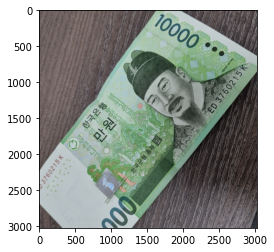

In [4]:
# original
image = Image.open(str(data_dir)+"/10000won/10000-1.jpg")
img_width, img_height = image.size

plt.imshow(np.asarray(image))

In [5]:
fn = image.filename
print(fn)

/content/drive/Shareddrives/캡스톤디자인/data/10000won/10000-1.jpg


In [6]:
fn[:-3]

'/content/drive/Shareddrives/캡스톤디자인/data/10000won/10000-1.'

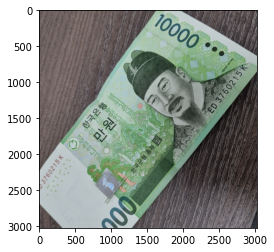

In [7]:
if img_width != img_height:
  m = min(img_width, img_height)
  image = image.crop((img_width//2 - m//2 , img_height//2 - m//2, img_width//2 + m//2 , img_height//2 + m//2,))
  img_width = m
  img_height = m

plt.imshow(np.asarray(image))

## 1. Crop
5가지로 자르기
1. 좌상
2. 우상
3. 좌하
4. 우하
5. 중앙

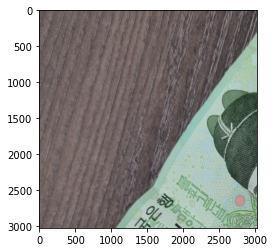

In [8]:
# 좌상
img = image.crop((0, 0, img_width//2+10, img_height//2+10))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

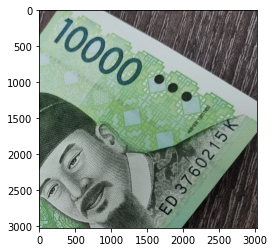

In [9]:
# 우상
img = image.crop((img_width//2-10, 0, img_width, img_height//2+10))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

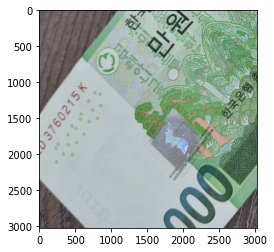

In [10]:
# 좌하
img = image.crop((0, img_height//2-10, img_width//2+10, img_height))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

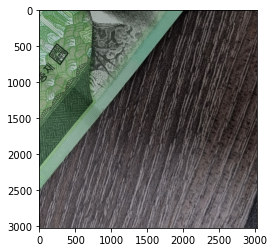

In [11]:
# 우하
img = image.crop((img_width//2-10, img_height//2-10, img_width, img_height))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

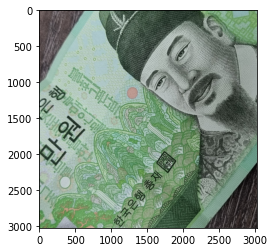

In [12]:
# 중앙
img = image.crop((img_width//4, img_height//4, img_width - img_width//4, img_height - img_height//4))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

## 2. Rotation
45도 단위로 회전   
90도 단위는 그대로, 45도 단위는 crop을 통해서 검은 부분 없애줌

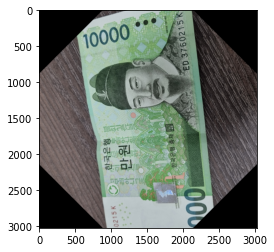

In [13]:
img = image.rotate(45)

plt.imshow(np.asarray(img))

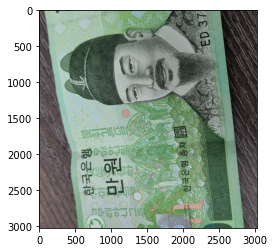

In [14]:
img = image.rotate(45)
img = img.crop((img_width//6, img_height//6, img_width - img_width//6, img_height - img_height//6))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

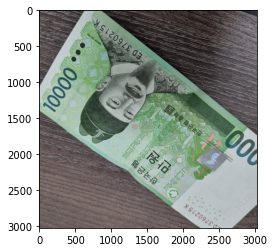

In [15]:
img = image.rotate(90)

plt.imshow(np.asarray(img))

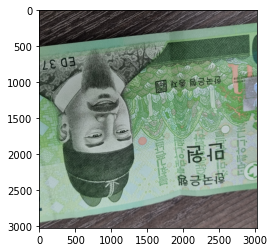

In [16]:
img = image.rotate(135)
img = img.crop((img_width//6, img_height//6, img_width - img_width//6, img_height - img_height//6))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

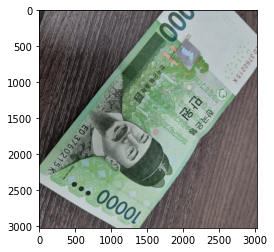

In [17]:
img = image.rotate(180)

plt.imshow(np.asarray(img))

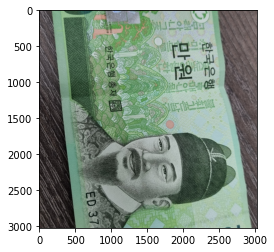

In [18]:
img = image.rotate(225)
img = img.crop((img_width//6, img_height//6, img_width - img_width//6, img_height - img_height//6))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

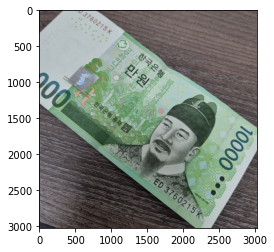

In [19]:
img = image.rotate(270)

plt.imshow(np.asarray(img))

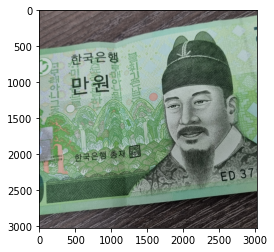

In [20]:
img = image.rotate(315)
img = img.crop((img_width//6, img_height//6, img_width - img_width//6, img_height - img_height//6))
img = img.resize((img_width, img_height))

plt.imshow(np.asarray(img))

## 3. Blur

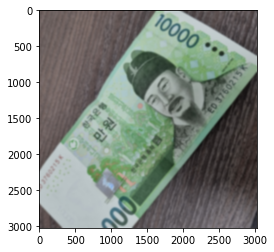

In [21]:
img = image.filter(ImageFilter.GaussianBlur(10))
img.save(fn[:-4]+'-blur.jpg')

plt.imshow(np.asarray(img))

# Define Function

In [22]:
def crop_image(img_file):
  fn = img_file.filename
  img_width, img_height = img_file.size
  
  if img_width != img_height:
    m = min(img_width, img_height)
    img = img_file.crop((img_width//2 - m//2 , img_height//2 - m//2, img_width//2 + m//2 , img_height//2 + m//2))
    img_width = m
    img_height = m
    img.save(fn[:-4]+'-cropcenter.jpg')

  else:
    # 좌상
    img = img_file.crop((0, 0, img_width//2+10, img_height//2+10))
    img = img.resize((img_width, img_height))
    img.save(fn[:-4]+'-cropleftup.jpg')

    # 우상
    img = img_file.crop((img_width//2-10, 0, img_width, img_height//2+10))
    img = img.resize((img_width, img_height))
    img.save(fn[:-4]+'-croprightup.jpg')

    # 좌하
    img = img_file.crop((0, img_height//2-10, img_width//2+10, img_height))
    img = img.resize((img_width, img_height))
    img.save(fn[:-4]+'-cropleftdown.jpg')

    # 우하
    img = img_file.crop((img_width//2-10, img_height//2-10, img_width, img_height))
    img = img.resize((img_width, img_height))
    img.save(fn[:-4]+'-croprightdown.jpg')

    # 중앙
    img = img_file.crop((img_width//4, img_height//4, img_width - img_width//4, img_height - img_height//4))
    img = img.resize((img_width, img_height))
    img.save(fn[:-4]+'-cropcenter.jpg')
    

In [23]:
def rotate_image(img_file):
  fn = img_file.filename
  img_width, img_height = img_file.size

  for r in range(45, 360, 45):
    if r % 10 != 0:   # 45도 단위
      img = img_file.rotate(r)
      img = img.crop((img_width//6, img_height//6, img_width - img_width//6, img_height - img_height//6))
      img = img.resize((img_width, img_height))

    else:
      img = img_file.rotate(90)

    img.save(fn[:-4]+'-rotate'+str(r)+'.jpg')


In [24]:
def blur_image(img_file):
  fn = img_file.filename
  img_width, img_height = img_file.size

  img = img_file.filter(ImageFilter.GaussianBlur(10))

  img.save(fn[:-4]+'-blur.jpg')
  

# Augment Data

In [25]:
# original
paper = ['1000won', '5000won', '10000won', '50000won']
coin = ['10won', '50won', '100won', '500won']

for p in paper:       # 지폐에 대해서
  paper_lst = os.listdir(str(data_dir)+"/"+p)
  for pl in paper_lst:
    image = Image.open(str(data_dir)+"/"+p+"/"+pl)
    crop_image(image)
    rotate_image(image)
    blur_image(image)
  print("Done Folder :" + p)
print("Done Paper Augmentation...")

for c in coin:
  coin_lst = os.listdir(str(data_dir)+"/"+c)
  for cl in coin_lst:
    image = Image.open(str(data_dir)+"/"+c+"/"+cl)
    crop_image(image)
    rotate_image(image)
    blur_image(image)
  print("Done Folder :" + c)
print("Done Coin Augmentation...")


Done Folder :1000won
Done Folder :5000won
Done Folder :10000won
Done Folder :50000won
Done Paper Augmentation...

Done Foler :10won
Done Foler :50won
Done Foler :100won
Done Foler :500won
Done Coin Augmentation...
